## Bank Marketing Dataset  

The Bank Marketing dataset contains information about customer campaigns from a Portuguese banking institution. The dataset is primarily used for predicting whether a client will subscribe to a term deposit through phone calls. It includes various attributes related to the customer, the marketing campaign, and the result of the campaign.  

### Dataset Overview  

- **Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)  
- **Number of Instances**: 45,211  
- **Number of Attributes**: 17  

### Attributes Description  

The dataset consists of the following attributes:  

1. **age**: Age of the client (numeric)  
2. **job**: Type of job (categorical: admin, blue-collar, entrepreneur, etc.)  
3. **marital**: Marital status (categorical: single, married, divorced)  
4. **education**: Level of education (categorical: primary, secondary, tertiary, etc.)  
5. **credit_default**: Whether the client has credit in default (binary: yes, no)  
6. **housing**: Whether the client has a housing loan (binary: yes, no)  
7. **loan**: Whether the client has a personal loan (binary: yes, no)  
8. **contact**: Type of communication (categorical: cellular, telephone)  
9. **month**: Month of last contact (categorical)  
10. **day_of_week**: Day of the week of last contact (categorical)  
11. **duration**: Duration of the last contact in seconds (numeric)  
12. **campaign**: Number of contacts performed during this campaign (numeric)  
13. **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  
14. **previous**: Number of contacts performed before this campaign for this client (numeric)  
15. **poutcome**: Outcome of the previous marketing campaign (categorical: success, failure, other)  
16. **subscription**: Indicates if the client subscribed to a term deposit (binary: yes, no) - target variable  


In [205]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [142]:
df= pd.read_csv(r"C:\Users\ASUS\Desktop\project\Bank Marketing\bank-full.csv",sep=";")

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
df.shape

(45211, 17)

In [143]:
df["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [20]:
df.describe(include=object).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
print("**Unique Values By Features**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(21),len(uniq))

**Unique Values By Features**
age                   77
job                   12
marital               3
education             4
default               2
balance               7168
housing               2
loan                  2
contact               3
day                   31
month                 12
duration              1573
campaign              48
pdays                 559
previous              41
poutcome              4
y                     2


In [55]:
cat_col=list(set(df.columns)- set(df._get_numeric_data().columns))
num_col=list(set(df._get_numeric_data().columns))
print("Categorical_columns are :{}".format(cat_col))
print("\n")
print("Numerical_columns are :{}".format(num_col))

Categorical_columns are :['job', 'loan', 'contact', 'education', 'month', 'default', 'housing', 'marital', 'poutcome', 'y']


Numerical_columns are :['pdays', 'balance', 'campaign', 'age', 'day', 'previous', 'duration']


In [68]:
df.groupby(["education","y"]).agg({"balance":["mean"],"duration":["mean"]})


balance    duration
                      mean        mean
education y                           
primary   no   1193.956230  220.470447
          yes  1854.639594  631.560068
secondary no   1114.160804  223.362086
          yes  1499.787347  557.884490
tertiary  no   1696.502963  217.053516
          yes  2109.083667  493.369238
unknown   no   1416.019938  224.869159
          yes  2232.027778  463.956349

## Data Visualization

In [172]:
df=pd.get_dummies(df,drop_first=True)

In [174]:
X = df.drop(columns='y_yes' ,axis=1)
y= df["y_yes"]

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [176]:
sc= StandardScaler()
sc.fit_transform(X_trian)
sc.transform(X_test)

array([[-0.08766277, -0.25836436,  0.0218912 , ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [ 0.57158127,  0.75518445, -0.81887439, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-1.50032857, -0.27225765,  0.50232868, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       ...,
       [ 1.04246987, -0.45022412,  1.22298491, ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.08766277, -0.19121344,  0.0218912 , ..., -0.20779147,
        -0.1860456 ,  0.47280581],
       [-0.37019593,  0.28049694,  0.50232868, ..., -0.20779147,
        -0.1860456 ,  0.47280581]])

In [192]:
tsne=TSNE(random_state=42)
vis_X_trian=tsne.fit_transform(X_trian)

<Axes: >

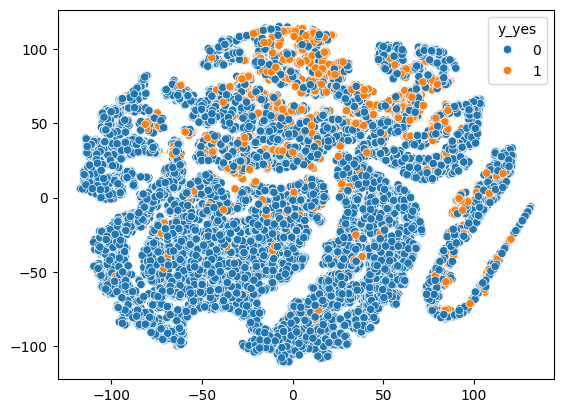

In [193]:
sns.scatterplot(x=vis_X_trian[:,0],y=vis_X_trian[:,1],hue=y_train)

## Feature Selection


This part demonstrates and compares feature selection using Lasso, RFE (Recursive Feature Elimination), and SelectFromModel with a Random Forest classifier.

In [177]:
# 1. Feature Selection using RFE with Random Forest  
clf = RandomForestClassifier(random_state=42)  
rfe = RFE(estimator=clf, n_features_to_select=20)  
rfe.fit(X_train, y_train) 

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20)

In [202]:
selected_features_rfe = X_train.columns[rfe.support_]  

In [179]:
# 2. Feature Selection using SelectFromModel with Random Forest 
selector=SelectFromModel(clf) 
result=selector.fit(X_train,y_train)

In [201]:
selected_features_SelectFromModel = X_train.columns[result.get_support()]  

In [182]:
# 3. Feature Selection using Lasso with Random Forest 
lasso = LassoCV(alphas=np.linspace(0.01, 1, 100), cv=5)  
lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5)

In [183]:
best_alpha = lasso.alpha_  
print(f"Best alpha from LassoCV: {best_alpha}")  

Best alpha from LassoCV: 0.01


In [188]:
lasso.coef_

array([ 2.59837975e-04,  3.40224849e-06, -5.15689749e-05,  4.82902486e-04,
       -1.78457064e-03,  2.43598269e-04,  3.46869017e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -4.65947776e-02, -0.00000000e+00,  0.00000000e+00, -2.13329452e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.43053951e-01, -0.00000000e+00])

In [189]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [200]:
selected_features_lasso_cv = X_train.columns[np.abs(lasso.coef_) > 0]  


In [199]:
print("lasso_cv:")
print(selected_features_lasso_cv)
print("-------------------------------------------------------------------------------")
print("SelectFromModel:")
print(selected_features_SelectFromModel)
print("-------------------------------------------------------------------------------")
print("RFE:")
print(selected_features_rfe)
print("-------------------------------------------------------------------------------")

lasso_cv:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'housing_yes', 'contact_unknown', 'poutcome_success'],
      dtype='object')
-------------------------------------------------------------------------------
SelectFromModel:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'poutcome_success'],
      dtype='object')
-------------------------------------------------------------------------------
RFE:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_management', 'job_technician', 'marital_married',
       'education_secondary', 'education_tertiary', 'housing_yes',
       'contact_unknown', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_oct', 'poutcome_success'],
      dtype='object')
-------------------------------------------------------------------------------


## Outlier Detection

In [207]:
df['anomaly']=IsolationForest(contamination=0.01).fit_predict(df)

In [210]:
outliers=df[df["anomaly"]==-1]
inliers=df[df["anomaly"]==1]